In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
playerplays = pd.read_csv("player_play.csv")
plays = pd.read_csv("plays.csv")
players = pd.read_csv("players.csv")

In [4]:
df = pd.read_csv("tracking_week_1.csv")
df2 = pd.read_csv("tracking_week_2.csv")

In [1259]:
df = pd.read_csv("tracking_week_3.csv")

In [5]:
df = pd.concat([df,df2])

In [6]:
motionplayers = playerplays[['gameId','playId','motionSinceLineset']][playerplays['motionSinceLineset']==True]

In [7]:
motionplays = pd.merge(
    motionplayers,
    plays[['gameId','playId','passResult']],
    how = "left",
    on = ['gameId','playId']
)

In [8]:
motionplays = motionplays[motionplays['passResult'].notna()]

In [9]:
routeRunners = pd.merge(
    playerplays[['gameId','playId','nflId','motionSinceLineset','inMotionAtBallSnap','wasRunningRoute','wasTargettedReceiver']][playerplays['wasRunningRoute']==True],
    plays[['gameId','playId','down','yardsToGo','offenseFormation','receiverAlignment','pff_passCoverage','absoluteYardlineNumber',]],
    how = "left",
    left_on = ['gameId','playId'],
    right_on = ['gameId','playId']
)


In [10]:
motionRunners = routeRunners.merge(
    motionplays[['gameId', 'playId']].drop_duplicates(), 
    on=['gameId', 'playId'], 
    how='inner'
)

In [11]:
snappositions = df[['gameId','playId','nflId','y']][df['frameType']=="SNAP"]

In [12]:
snappositions

,gameId,playId,nflId,y
113,2022091200,64,35459.0,29.43
276,2022091200,64,39987.0,23.86
439,2022091200,64,41310.0,22.21
602,2022091200,64,42393.0,13.41
765,2022091200,64,42403.0,17.63
...,...,...,...,...
6703949,2022091500,4076,53492.0,29.84
6704043,2022091500,4076,53591.0,33.32
6704137,2022091500,4076,53655.0,28.53
6704231,2022091500,4076,54519.0,29.87


In [13]:
motionRunners = pd.merge(
    motionRunners,
    snappositions,
    how = "left",
    on = ['gameId','playId','nflId']
)

In [14]:
motionRunners

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
0,2022090800,56,42489,True,False,1.0,1,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65
1,2022090800,56,44985,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,18.20
2,2022090800,56,47879,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,34.37
3,2022090800,56,52536,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,8.25
4,2022090800,212,42818,False,False,1.0,0,2,9,SHOTGUN,2x2,Cover-1,44,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,2022110700,2496,54476,False,False,1.0,1,3,6,SHOTGUN,2x2,Cover-6 Right,51,NaN
16432,2022110700,3059,43415,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN
16433,2022110700,3059,52500,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN
16434,2022110700,3059,52609,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN


In [15]:
weekone = motionRunners[motionRunners['y'].notna()]

In [16]:
weekone[weekone['motionSinceLineset'].isna()]

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
1913,2022091110,673,40011,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,32.52
1914,2022091110,673,47839,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,26.99
1916,2022091110,673,53591,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,31.20
1917,2022091110,673,54519,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,14.57
2097,2022091111,232,40024,NaN,False,1.0,0,1,10,SINGLEBACK,3x1,Cover-2,84,22.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2022091900,3210,54596,NaN,NaN,1.0,0,2,7,SHOTGUN,2x2,Quarters,48,24.69
4685,2022091901,64,46118,NaN,NaN,1.0,0,1,10,EMPTY,3x2,Quarters,28,23.30
4686,2022091901,64,47834,NaN,NaN,1.0,0,1,10,EMPTY,3x2,Quarters,28,20.36
4687,2022091901,64,47836,NaN,NaN,1.0,0,1,10,EMPTY,3x2,Quarters,28,45.13


In [17]:
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)

C:\Users\rschw\AppData\Local\Temp\ipykernel_10988\1285583402.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
C:\Users\rschw\AppData\Local\Temp\ipykernel_10988\1285583402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
C:\Users\rschw\AppData\Local\Temp\ipykernel_10988\1285583402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [18]:
linecoords1 = pd.read_csv("linecoods.csv")

In [19]:
linecoords2 = pd.read_csv("linecoods2.csv")

In [1272]:
linecoords3 = pd.read_csv("linecoods3.csv")

In [20]:
linecoords = pd.concat([linecoords1,linecoords2])

In [22]:
linecoords3 = pd.read_csv("linecoods3.csv")
linecoords4 = pd.read_csv("linecoods4.csv")
linecoords5 = pd.read_csv("linecoods5.csv")
linecoords6 = pd.read_csv("linecoods6.csv")
linecoords7 = pd.read_csv("linecoods7.csv")
linecoords8 = pd.read_csv("linecoods8.csv")
linecoords9 = pd.read_csv("linecoods9.csv")

In [607]:
linecoords = pd.concat([linecoords,linecoords3,linecoords4,linecoords5,linecoords6,linecoords7,linecoords8,linecoords9],)

NameError: name 'linecoords3' is not defined

In [22]:
weekone = pd.merge(
    weekone,
    linecoords[['gameId','playId','topOfLine','bottomOfLine']],
    how = "left",
    on = ['gameId','playId']
    )

In [23]:
weekone = pd.merge(
    weekone,
    players[['nflId','position']]
)

In [24]:
weekone

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y,topOfLine,bottomOfLine,position
0,2022090800,56,42489,True,False,1.0,1,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65,32.87,26.35,WR
1,2022090800,56,44985,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,18.20,32.87,26.35,WR
2,2022090800,56,47879,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,34.37,32.87,26.35,TE
3,2022090800,56,52536,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,8.25,32.87,26.35,WR
4,2022090800,212,42818,False,False,1.0,0,2,9,SHOTGUN,2x2,Cover-1,44,8.24,32.45,25.65,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,2022091901,3444,40488,False,False,1.0,1,1,9,EMPTY,3x2,Cover-0,19,15.19,26.36,20.21,WR
4763,2022091901,3444,44853,True,False,1.0,0,1,9,EMPTY,3x2,Cover-0,19,44.77,26.36,20.21,RB
4764,2022091901,3444,47833,False,False,1.0,0,1,9,EMPTY,3x2,Cover-0,19,37.25,26.36,20.21,TE
4765,2022091901,3444,52430,False,False,1.0,0,1,9,EMPTY,3x2,Cover-0,19,31.73,26.36,20.21,WR


In [25]:
safetyPositions = pd.read_csv("safetyPositions")

In [26]:
weekone = pd.merge(
    weekone,
    safetyPositions,
    how = "left",
    on = ['gameId','playId']
)

In [27]:
weekone = weekone[weekone['topOfLine'].notna()]

In [28]:
weekone.columns

Index(['gameId', 'playId', 'nflId', 'motionSinceLineset', 'inMotionAtBallSnap',
       'wasRunningRoute', 'wasTargettedReceiver', 'down', 'yardsToGo',
       'offenseFormation', 'receiverAlignment', 'pff_passCoverage',
       'absoluteYardlineNumber', 'y', 'topOfLine', 'bottomOfLine', 'position',
       'Unnamed: 0', 'safetyTop', 'safetyBottom'],
      dtype='object')

In [29]:
one = pd.DataFrame(columns=[
    'gameId', 'playId', 'down', 'yardsToGo', 'offenseFormation', 
    'pff_passCoverage', 'absoluteYardlineNumber', 'receiverAlignment',
    'firstY', 'secondY', 'thirdY', 'fourthY', 'fifthY', 'sixthY', 'rbPosition',
    'aboveLine', 'belowLine', 'motionReceiver', 'motionCluster', 'inMotionAtBallSnap', 
    'targetedReceiver', 'maxSeparationReceiver', 'nflId'
])

for _, i in weekone.iterrows():
    inone = ((one['gameId'] == i['gameId']) & (one['playId'] == i['playId'])).any()
    
    if not inone:
        play = weekone[(weekone['gameId'] == i['gameId']) & 
                       (weekone['playId'] == i['playId'])]
        play = play.sort_values(by='y', ascending=False)
        motion_players = play[play['motionSinceLineset']]  # Get motion players

        for _, motion_player in motion_players.iterrows():
            thisplay = [
                i['gameId'],
                i['playId'],
                i['down'], 
                i['yardsToGo'], 
                i['offenseFormation'],
                i['pff_passCoverage'], 
                i['absoluteYardlineNumber'],
                i['receiverAlignment']
            ]

            motionrec = 0
            targetrec = 0
            motionindex = 1
            targetindex = 1
            aboveline = 0
            belowline = 0
            moving = False
            rbindex = 0
            for _, j in play.iterrows():
                thisplay.append(j['y'])
                if j['y'] > j['topOfLine']:
                    aboveline += 1
                elif j['y'] < j['bottomOfLine']:
                    belowline += 1
                if j['motionSinceLineset']:
                    if j['nflId'] == motion_player['nflId']:  # Focus on specific motion player
                        motionrec = motionindex
                        if j['inMotionAtBallSnap']:
                            moving = True
                if j['position'] == 'RB':
                    rbindex = targetindex
                if j['wasTargettedReceiver']:
                    targetrec = targetindex
                motionindex += 1
                targetindex += 1

            while len(thisplay) < 14:
                thisplay.append(0)

            thisplay.extend([
                rbindex,
                aboveline,
                belowline,
                motionrec,
                0,  # Add motion cluster
                moving,
                targetrec,
                0,  # Placeholder for max separation receiver
                motion_player['nflId']
            ])
            
            # Convert thisplay to DataFrame and append to `one`
            new_row = pd.DataFrame([thisplay], columns=one.columns)
            one = pd.concat([one, new_row], ignore_index=True)


C:\Users\rschw\AppData\Local\Temp\ipykernel_10988\3915437751.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  one = pd.concat([one, new_row], ignore_index=True)


In [31]:
one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,sixthY,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,0,0,2,2,1,0,False,1,0,42489
1,2022090800,212,2,9,SHOTGUN,Cover-1,44,2x2,43.24,32.83,...,0,3,2,2,2,0,True,3,0,47879
2,2022090800,236,3,1,I_FORM,Cover-3,36,2x1,35.27,29.50,...,0,2,1,0,1,0,True,1,0,52536
3,2022090800,364,3,8,SHOTGUN,Cover 6-Left,29,3x1,44.53,31.45,...,0,2,1,3,5,0,False,5,0,44881
4,2022090800,438,1,10,SINGLEBACK,Cover-2,63,2x2,35.72,30.07,...,0,3,2,2,4,0,True,4,0,53678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022091901,2406,2,2,SHOTGUN,Quarters,83,2x2,43.20,35.00,...,0,3,2,2,5,0,True,5,0,47834
1142,2022091901,2491,1,10,PISTOL,Quarters,63,3x1,44.67,33.52,...,0,4,3,1,4,0,True,5,0,46270
1143,2022091901,2567,1,15,SHOTGUN,Quarters,41,2x2,43.13,34.57,...,0,3,2,2,3,0,False,5,0,46270
1144,2022091901,3139,3,9,SHOTGUN,Cover-1 Double,99,3x1,38.22,32.08,...,0,2,1,2,2,0,False,4,0,44853


In [32]:
clusters = pd.read_csv('clusters.csv')

In [33]:
clusters[['gameId','playId','nflId','cluster']]

,gameId,playId,nflId,cluster
0,2022090800,56,42489.0,3.0
1,2022090800,80,47857.0,6.0
2,2022090800,212,47879.0,0.0
3,2022090800,236,52536.0,3.0
4,2022090800,299,44881.0,1.0
...,...,...,...,...
1134,2022091200,3382,46109.0,3.0
1135,2022091200,3491,46096.0,2.0
1136,2022091200,3553,52423.0,3.0
1137,2022091200,3596,52423.0,5.0


In [34]:
clusters['cluster'].value_counts()

cluster
5.0    235
4.0    205
0.0    173
3.0    156
2.0    147
1.0    137
6.0     86
Name: count, dtype: int64

In [35]:
week_one = pd.merge(
    one,
    clusters[['gameId','playId','nflId','cluster']],
    how = "left",
    on = ['gameId','playId', 'nflId']
)

In [36]:
week_one['motionCluster'] = week_one['cluster']

In [37]:
week_one[week_one['motionCluster'].isna()]

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster
8,2022090800,721,2,7,SHOTGUN,Cover-3,39,2x2,46.86,34.36,...,0,2,2,1,NaN,False,1,0,44985,NaN
13,2022090800,1102,2,6,SHOTGUN,Quarters,85,3x1,37.98,33.43,...,2,2,3,2,NaN,False,2,0,52494,NaN
19,2022090800,1286,1,10,SINGLEBACK,Cover-2,46,2x2,32.75,28.78,...,0,2,1,3,NaN,True,2,0,53486,NaN
20,2022090800,1334,3,14,EMPTY,Cover-3,50,3x2,39.00,34.62,...,4,3,2,4,NaN,False,5,0,47853,NaN
32,2022090800,2572,2,9,SHOTGUN,Cover-3 Seam,76,2x2,43.19,36.45,...,3,2,0,5,NaN,True,3,0,53079,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022091901,2406,2,2,SHOTGUN,Quarters,83,2x2,43.20,35.00,...,3,2,2,5,NaN,True,5,0,47834,NaN
1142,2022091901,2491,1,10,PISTOL,Quarters,63,3x1,44.67,33.52,...,4,3,1,4,NaN,True,5,0,46270,NaN
1143,2022091901,2567,1,15,SHOTGUN,Quarters,41,2x2,43.13,34.57,...,3,2,2,3,NaN,False,5,0,46270,NaN
1144,2022091901,3139,3,9,SHOTGUN,Cover-1 Double,99,3x1,38.22,32.08,...,2,1,2,2,NaN,False,4,0,44853,NaN


In [ ]:
#week_one = week_one.drop(columns = ['motionCluster'])

In [ ]:
#week_one = week_one.dropna(subset=['motionCluster'])

In [38]:
week_one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,0,2,2,1,3.0,False,1,0,42489,3.0
1,2022090800,212,2,9,SHOTGUN,Cover-1,44,2x2,43.24,32.83,...,3,2,2,2,0.0,True,3,0,47879,0.0
2,2022090800,236,3,1,I_FORM,Cover-3,36,2x1,35.27,29.50,...,2,1,0,1,3.0,True,1,0,52536,3.0
3,2022090800,364,3,8,SHOTGUN,Cover 6-Left,29,3x1,44.53,31.45,...,2,1,3,5,2.0,False,5,0,44881,2.0
4,2022090800,438,1,10,SINGLEBACK,Cover-2,63,2x2,35.72,30.07,...,3,2,2,4,1.0,True,4,0,53678,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022091901,2406,2,2,SHOTGUN,Quarters,83,2x2,43.20,35.00,...,3,2,2,5,NaN,True,5,0,47834,NaN
1142,2022091901,2491,1,10,PISTOL,Quarters,63,3x1,44.67,33.52,...,4,3,1,4,NaN,True,5,0,46270,NaN
1143,2022091901,2567,1,15,SHOTGUN,Quarters,41,2x2,43.13,34.57,...,3,2,2,3,NaN,False,5,0,46270,NaN
1144,2022091901,3139,3,9,SHOTGUN,Cover-1 Double,99,3x1,38.22,32.08,...,2,1,2,2,NaN,False,4,0,44853,NaN


In [39]:
week_one = week_one[week_one['targetedReceiver']!=0]

In [40]:
week_one['motionReceiverTarget'] = np.where(
    week_one['targetedReceiver'] == week_one['motionReceiver'], 1, 0
)

C:\Users\rschw\AppData\Local\Temp\ipykernel_10988\677613765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_one['motionReceiverTarget'] = np.where(


In [41]:
week_one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster,motionReceiverTarget
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,2,2,1,3.0,False,1,0,42489,3.0,1
1,2022090800,212,2,9,SHOTGUN,Cover-1,44,2x2,43.24,32.83,...,2,2,2,0.0,True,3,0,47879,0.0,0
2,2022090800,236,3,1,I_FORM,Cover-3,36,2x1,35.27,29.50,...,1,0,1,3.0,True,1,0,52536,3.0,1
3,2022090800,364,3,8,SHOTGUN,Cover 6-Left,29,3x1,44.53,31.45,...,1,3,5,2.0,False,5,0,44881,2.0,1
4,2022090800,438,1,10,SINGLEBACK,Cover-2,63,2x2,35.72,30.07,...,2,2,4,1.0,True,4,0,53678,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022091901,2406,2,2,SHOTGUN,Quarters,83,2x2,43.20,35.00,...,2,2,5,NaN,True,5,0,47834,NaN,1
1142,2022091901,2491,1,10,PISTOL,Quarters,63,3x1,44.67,33.52,...,3,1,4,NaN,True,5,0,46270,NaN,0
1143,2022091901,2567,1,15,SHOTGUN,Quarters,41,2x2,43.13,34.57,...,2,2,3,NaN,False,5,0,46270,NaN,0
1144,2022091901,3139,3,9,SHOTGUN,Cover-1 Double,99,3x1,38.22,32.08,...,1,2,2,NaN,False,4,0,44853,NaN,0


In [42]:
playerplays.columns

Index(['gameId', 'playId', 'nflId', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'timeT

In [43]:
play_1 = plays[['timeToThrow','gameId', 'playId']]

In [44]:
week_one = pd.merge(
    week_one,
    play_1[['timeToThrow','gameId', 'playId']],
    how = "left",
    on = ['gameId','playId']
)

In [45]:
week_one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster,motionReceiverTarget,timeToThrow
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,2,1,3.0,False,1,0,42489,3.0,1,2.169
1,2022090800,212,2,9,SHOTGUN,Cover-1,44,2x2,43.24,32.83,...,2,2,0.0,True,3,0,47879,0.0,0,4.905
2,2022090800,236,3,1,I_FORM,Cover-3,36,2x1,35.27,29.50,...,0,1,3.0,True,1,0,52536,3.0,1,2.636
3,2022090800,364,3,8,SHOTGUN,Cover 6-Left,29,3x1,44.53,31.45,...,3,5,2.0,False,5,0,44881,2.0,1,4.004
4,2022090800,438,1,10,SINGLEBACK,Cover-2,63,2x2,35.72,30.07,...,2,4,1.0,True,4,0,53678,1.0,1,3.636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,2022091901,2406,2,2,SHOTGUN,Quarters,83,2x2,43.20,35.00,...,2,5,NaN,True,5,0,47834,NaN,1,5.779
1029,2022091901,2491,1,10,PISTOL,Quarters,63,3x1,44.67,33.52,...,1,4,NaN,True,5,0,46270,NaN,0,2.126
1030,2022091901,2567,1,15,SHOTGUN,Quarters,41,2x2,43.13,34.57,...,2,3,NaN,False,5,0,46270,NaN,0,2.187
1031,2022091901,3139,3,9,SHOTGUN,Cover-1 Double,99,3x1,38.22,32.08,...,2,2,NaN,False,4,0,44853,NaN,0,2.469


In [46]:
week_one['motionReceiverTarget'].value_counts()

motionReceiverTarget
0    725
1    308
Name: count, dtype: int64

In [47]:
week_one.head(50)

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster,motionReceiverTarget,timeToThrow
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,2,1,3.0,False,1,0,42489,3.0,1,2.169
1,2022090800,212,2,9,SHOTGUN,Cover-1,44,2x2,43.24,32.83,...,2,2,0.0,True,3,0,47879,0.0,0,4.905
2,2022090800,236,3,1,I_FORM,Cover-3,36,2x1,35.27,29.50,...,0,1,3.0,True,1,0,52536,3.0,1,2.636
3,2022090800,364,3,8,SHOTGUN,Cover 6-Left,29,3x1,44.53,31.45,...,3,5,2.0,False,5,0,44881,2.0,1,4.004
4,2022090800,438,1,10,SINGLEBACK,Cover-2,63,2x2,35.72,30.07,...,2,4,1.0,True,4,0,53678,1.0,1,3.636
5,2022090800,569,3,4,SHOTGUN,Cover-3,95,2x2,34.99,34.61,...,2,1,5.0,True,1,0,42489,5.0,1,1.868
6,2022090800,617,1,10,SHOTGUN,Cover-3,74,2x1,34.55,25.55,...,1,3,5.0,True,3,0,44985,5.0,1,2.669
7,2022090800,721,2,7,SHOTGUN,Cover-3,39,2x2,46.86,34.36,...,2,1,NaN,False,1,0,44985,NaN,1,1.869
8,2022090800,721,2,7,SHOTGUN,Cover-3,39,2x2,46.86,34.36,...,2,3,1.0,False,1,0,42448,1.0,0,1.869
9,2022090800,818,3,4,EMPTY,Cover-2,80,3x2,44.18,27.82,...,3,2,2.0,True,2,0,47853,2.0,1,2.703


In [48]:
motion_data = pd.read_csv('final_data.csv')
motion_data1 = pd.read_csv('final_data1.csv')

In [49]:
motion_data = motion_data.drop(columns=["Unnamed: 0", "absoluteYardlineNumber","pos_TE", "pos_WR"])

In [50]:
motion_data

,gameId,playId,nflId,x_first,x_last,x_max,x_min,y_first,y_last,y_max,y_min,direction_change,inMotionAtBallSnap,total_distance,adjusted_x_first,adjusted_x_last,adjusted_x_max,adjusted_x_min
0,2022090800,56,42489.0,87.02,86.24,87.17,86.24,27.91,43.65,43.67,27.91,0,0,22.138798,2.02,1.24,2.17,1.24
1,2022090800,80,47857.0,81.74,85.83,85.83,81.72,39.38,31.54,39.41,28.69,1,1,55.299840,2.74,6.83,6.83,2.72
2,2022090800,212,47879.0,45.90,46.68,46.68,45.90,23.83,32.83,32.83,23.83,0,1,21.079664,1.90,2.68,2.68,1.90
3,2022090800,236,52536.0,37.08,36.79,37.12,36.79,40.09,35.27,40.09,35.27,0,1,29.596483,1.08,0.79,1.12,0.79
4,2022090800,299,43399.0,24.11,25.54,25.76,24.09,23.81,18.99,23.81,18.86,0,0,100.000000,2.89,1.46,1.24,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,2022091901,3139,44853.0,104.35,104.08,104.54,104.08,26.52,32.08,32.19,26.52,0,0,88.512693,5.35,5.08,5.54,5.08
2130,2022091901,3444,44853.0,21.95,20.77,21.95,20.77,27.48,44.77,44.77,27.48,0,0,52.344203,2.95,1.77,2.95,1.77
2131,2022091901,3557,47834.0,39.01,38.04,39.01,36.49,15.02,35.38,35.38,15.01,1,1,42.902809,1.99,2.96,1.99,4.51
2132,2022091901,3578,45102.0,41.52,40.50,41.70,40.16,13.95,27.95,27.95,13.88,0,1,28.463142,2.48,3.50,2.30,3.84


In [68]:
week_one = pd.merge(
    week_one,               # The left DataFrame (week_one)
    motion_data,            # The right DataFrame (motion_data)
    how="inner",             # Type of join: 'left' keeps all rows from week_one
    on=['gameId', 'playId'] # The columns used for matching rows
)

In [ ]:
# For Rohit, I reran this twice on the first two weeks combined, ended up with 2946 rows and 58 columns, you can drop the extra columns, and the rf accuracy should be around .90
week_one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,y_last_y,y_max_y,y_min_y,direction_change_y,inMotionAtBallSnap,total_distance_y,adjusted_x_first_y,adjusted_x_last_y,adjusted_x_max_y,adjusted_x_min_y
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,43.65,43.67,27.91,0,0,22.138798,2.02,1.24,2.17,1.24
1,2022090800,212,2,9,SHOTGUN,Cover-1,44,2x2,43.24,32.83,...,32.83,32.83,23.83,0,1,21.079664,1.90,2.68,2.68,1.90
2,2022090800,236,3,1,I_FORM,Cover-3,36,2x1,35.27,29.50,...,35.27,40.09,35.27,0,1,29.596483,1.08,0.79,1.12,0.79
3,2022090800,364,3,8,SHOTGUN,Cover 6-Left,29,3x1,44.53,31.45,...,14.66,29.75,14.65,0,0,49.293067,9.61,2.83,2.83,9.65
4,2022090800,438,1,10,SINGLEBACK,Cover-2,63,2x2,35.72,30.07,...,19.88,19.88,14.41,0,1,49.836154,2.59,3.71,2.57,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,2022091901,2406,2,2,SHOTGUN,Quarters,83,2x2,43.20,35.00,...,11.84,11.84,9.85,0,1,21.082834,2.07,2.47,2.47,2.04
2942,2022091901,2491,1,10,PISTOL,Quarters,63,3x1,44.67,33.52,...,24.46,24.46,21.72,0,1,26.614554,6.33,6.82,6.82,6.33
2943,2022091901,2567,1,15,SHOTGUN,Quarters,41,2x2,43.13,34.57,...,26.15,26.15,21.08,0,0,63.621021,5.23,5.13,5.85,5.13
2944,2022091901,3139,3,9,SHOTGUN,Cover-1 Double,99,3x1,38.22,32.08,...,32.08,32.19,26.52,0,0,88.512693,5.35,5.08,5.54,5.08


In [70]:
week_one.columns

Index(['gameId', 'playId', 'down', 'yardsToGo', 'offenseFormation',
       'pff_passCoverage', 'absoluteYardlineNumber', 'receiverAlignment',
       'firstY', 'secondY', 'thirdY', 'fourthY', 'fifthY', 'sixthY',
       'rbPosition', 'aboveLine', 'belowLine', 'motionReceiver',
       'motionCluster', 'inMotionAtBallSnap_x', 'targetedReceiver',
       'maxSeparationReceiver', 'nflId_x', 'cluster', 'motionReceiverTarget',
       'timeToThrow', 'nflId_y', 'x_first_x', 'x_last_x', 'x_max_x', 'x_min_x',
       'y_first_x', 'y_last_x', 'y_max_x', 'y_min_x', 'direction_change_x',
       'inMotionAtBallSnap_y', 'total_distance_x', 'adjusted_x_first_x',
       'adjusted_x_last_x', 'adjusted_x_max_x', 'adjusted_x_min_x', 'nflId',
       'x_first_y', 'x_last_y', 'x_max_y', 'x_min_y', 'y_first_y', 'y_last_y',
       'y_max_y', 'y_min_y', 'direction_change_y', 'inMotionAtBallSnap',
       'total_distance_y', 'adjusted_x_first_y', 'adjusted_x_last_y',
       'adjusted_x_max_y', 'adjusted_x_min_y'],
  

In [668]:
import seaborn as sns
import matplotlib as plt

In [1171]:
week_one.head()

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,y_last,y_max,y_min,direction_change,inMotionAtBallSnap_y,total_distance,adjusted_x_first,adjusted_x_last,adjusted_x_max,adjusted_x_min
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,43.65,43.67,27.91,0,0,22.138798,2.02,1.24,2.17,1.24
1,2022090800,212,2,9,SHOTGUN,Cover-1,44,2x2,43.24,32.83,...,32.83,32.83,23.83,0,1,21.079664,1.90,2.68,2.68,1.90
2,2022090800,236,3,1,I_FORM,Cover-3,36,2x1,35.27,29.50,...,35.27,40.09,35.27,0,1,29.596483,1.08,0.79,1.12,0.79
3,2022090800,364,3,8,SHOTGUN,Cover 6-Left,29,3x1,44.53,31.45,...,14.66,29.75,14.65,0,0,49.293067,9.61,2.83,2.83,9.65
4,2022090800,438,1,10,SINGLEBACK,Cover-2,63,2x2,35.72,30.07,...,19.88,19.88,14.41,0,1,49.836154,2.59,3.71,2.57,3.71


Modeling

Random Forest

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [71]:
X_original = week_one.drop(columns=['gameId','playId','receiverAlignment','maxSeparationReceiver', 'sixthY', 'motionReceiverTarget',"targetedReceiver",])
X = pd.get_dummies(X_original, columns=['down','rbPosition','offenseFormation','motionReceiver','pff_passCoverage',])

In [72]:
y = week_one['motionReceiverTarget']
y = y.astype("category")

In [57]:
X.columns

Index(['yardsToGo', 'absoluteYardlineNumber', 'firstY', 'secondY', 'thirdY',
       'fourthY', 'fifthY', 'aboveLine', 'belowLine', 'motionCluster',
       'inMotionAtBallSnap_x', 'nflId_x', 'cluster', 'timeToThrow', 'nflId_y',
       'x_first', 'x_last', 'x_max', 'x_min', 'y_first', 'y_last', 'y_max',
       'y_min', 'direction_change', 'inMotionAtBallSnap_y', 'total_distance',
       'adjusted_x_first', 'adjusted_x_last', 'adjusted_x_max',
       'adjusted_x_min', 'down_1', 'down_2', 'down_3', 'down_4',
       'rbPosition_0', 'rbPosition_1', 'rbPosition_2', 'rbPosition_3',
       'rbPosition_4', 'rbPosition_5', 'offenseFormation_EMPTY',
       'offenseFormation_I_FORM', 'offenseFormation_JUMBO',
       'offenseFormation_PISTOL', 'offenseFormation_SHOTGUN',
       'offenseFormation_SINGLEBACK', 'motionReceiver_1', 'motionReceiver_2',
       'motionReceiver_3', 'motionReceiver_4', 'motionReceiver_5',
       'pff_passCoverage_2-Man', 'pff_passCoverage_Bracket',
       'pff_passCoverage_C

In [73]:
X_original = week_one.drop(columns=['gameId','playId','receiverAlignment','maxSeparationReceiver', 'sixthY', 'motionReceiverTarget',"targetedReceiver"])
    
X = pd.get_dummies(X_original, columns=['down','rbPosition','offenseFormation','motionReceiver','pff_passCoverage',])

In [74]:
FirstX = X
FirstY = y

In [1309]:
SecondX = X
SecondY = y

In [1373]:
SecondX

,yardsToGo,absoluteYardlineNumber,firstY,secondY,thirdY,fourthY,fifthY,aboveLine,belowLine,motionCluster,...,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,motionReceiver_1,motionReceiver_2,motionReceiver_3,motionReceiver_4,motionReceiver_5
0,10,71,36.19,31.38,29.22,9.35,0,2,1,NaN,...,False,False,False,True,False,False,True,False,False,False
1,10,30,35.30,34.71,29.34,24.47,19.53,2,2,NaN,...,False,False,False,False,True,True,False,False,False,False
2,10,30,35.30,34.71,29.34,24.47,19.53,2,2,NaN,...,False,False,False,False,True,True,False,False,False,False
3,10,30,35.30,34.71,29.34,24.47,19.53,2,2,NaN,...,False,False,False,False,True,True,False,False,False,False
4,10,30,35.30,34.71,29.34,24.47,19.53,2,2,NaN,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,4,69,35.83,35.76,30.18,21.61,8.0,3,1,NaN,...,False,False,False,True,False,True,False,False,False,False
983,10,83,43.85,36.88,25.78,18.98,0,2,1,NaN,...,False,False,False,True,False,False,False,True,False,False
984,1,84,34.97,19.95,0.00,0.00,0,1,1,NaN,...,False,False,False,False,True,True,False,False,False,False
985,10,42,45.46,38.06,33.63,28.46,9.7,4,1,NaN,...,True,False,False,False,False,False,False,False,True,False


In [1374]:
FirstX

,yardsToGo,absoluteYardlineNumber,firstY,secondY,thirdY,fourthY,fifthY,aboveLine,belowLine,motionCluster,...,offenseFormation_EMPTY,offenseFormation_I_FORM,offenseFormation_PISTOL,offenseFormation_SHOTGUN,offenseFormation_SINGLEBACK,motionReceiver_1,motionReceiver_2,motionReceiver_3,motionReceiver_4,motionReceiver_5
0,10,85,43.65,34.37,18.20,8.25,0,2,2,3.0,...,False,False,False,True,False,True,False,False,False,False
1,9,44,43.24,32.83,31.75,17.48,8.24,2,2,0.0,...,False,False,False,True,False,False,True,False,False,False
2,1,36,35.27,29.50,29.37,0.00,0,1,0,3.0,...,False,True,False,False,False,True,False,False,False,False
3,8,29,44.53,31.45,21.99,19.36,14.66,1,3,2.0,...,False,False,False,True,False,False,False,False,False,True
4,10,63,35.72,30.07,23.97,19.88,18.82,2,2,1.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,2,83,43.20,35.00,21.48,18.65,11.84,2,2,NaN,...,False,False,False,True,False,False,False,False,False,True
2942,10,63,44.67,33.52,30.26,24.46,11.46,3,1,NaN,...,False,False,True,False,False,False,False,False,True,False
2943,15,41,43.13,34.57,26.15,18.76,8.54,2,2,NaN,...,False,False,False,True,False,False,False,True,False,False
2944,9,99,38.22,32.08,18.05,14.65,0,1,2,NaN,...,False,False,False,True,False,False,True,False,False,False


In [1313]:
SecondX.columns

Index(['yardsToGo', 'absoluteYardlineNumber', 'firstY', 'secondY', 'thirdY',
       'fourthY', 'fifthY', 'aboveLine', 'belowLine', 'motionCluster',
       'inMotionAtBallSnap_x', 'cluster', 'timeToThrow', 'x_first_x',
       'x_last_x', 'x_max_x', 'x_min_x', 'y_first_x', 'y_last_x', 'y_max_x',
       'y_min_x', 'direction_change_x', 'inMotionAtBallSnap_y',
       'total_distance_x', 'adjusted_x_first_x', 'adjusted_x_last_x',
       'adjusted_x_max_x', 'adjusted_x_min_x', 'inMotionAtBallSnap', 'down_1',
       'down_2', 'down_3', 'down_4', 'rbPosition_0', 'rbPosition_1',
       'rbPosition_2', 'rbPosition_3', 'rbPosition_4', 'rbPosition_5',
       'offenseFormation_EMPTY', 'offenseFormation_I_FORM',
       'offenseFormation_PISTOL', 'offenseFormation_SHOTGUN',
       'offenseFormation_SINGLEBACK', 'motionReceiver_1', 'motionReceiver_2',
       'motionReceiver_3', 'motionReceiver_4', 'motionReceiver_5',
       'pff_passCoverage_2-Man', 'pff_passCoverage_Cover 6-Left',
       'pff_passCov

In [1353]:
FirstX = FirstX.drop(columns=['offenseFormation_JUMBO'])

In [1338]:
SecondX = SecondX.drop(columns=['pff_passCoverage_2-Man', 'pff_passCoverage_Cover 6-Left',
       'pff_passCoverage_Cover-0', 'pff_passCoverage_Cover-1',
       'pff_passCoverage_Cover-2', 'pff_passCoverage_Cover-3',
       'pff_passCoverage_Cover-3 Seam', 'pff_passCoverage_Cover-6 Right',
       'pff_passCoverage_Prevent', 'pff_passCoverage_Quarters',
       'pff_passCoverage_Red Zone'])

In [1204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(FirstX, FirstY, test_size=0.2, random_state=42)

In [76]:
class_weights = {0: 1, 1: 3}
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, random_state=42)

In [77]:
feature_importances = rf.feature_importances_
important = pd.DataFrame()
for name, importance in zip(X.columns, feature_importances):
    important = pd.concat([important, pd.DataFrame({'Name': [name], 'Importance': [importance]})], ignore_index=True)

important = important.sort_values(by='Importance', ascending=False)
important.head(25)

,Name,Importance
11,nflId_x,0.079336
5,fourthY,0.037087
13,timeToThrow,0.036677
4,thirdY,0.033382
9,motionCluster,0.031894
3,secondY,0.031622
12,cluster,0.031456
63,motionReceiver_2,0.031329
2,firstY,0.028652
65,motionReceiver_4,0.022024


In [78]:
y_pred = rf.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.89


In [1372]:
SecondX.columns

Index(['yardsToGo', 'absoluteYardlineNumber', 'firstY', 'secondY', 'thirdY',
       'fourthY', 'fifthY', 'aboveLine', 'belowLine', 'motionCluster',
       'inMotionAtBallSnap_x', 'cluster', 'timeToThrow', 'x_first_x',
       'x_last_x', 'x_max_x', 'x_min_x', 'y_first_x', 'y_last_x', 'y_max_x',
       'y_min_x', 'direction_change_x', 'inMotionAtBallSnap_y',
       'total_distance_x', 'adjusted_x_first_x', 'adjusted_x_last_x',
       'adjusted_x_max_x', 'adjusted_x_min_x', 'inMotionAtBallSnap', 'down_1',
       'down_2', 'down_3', 'down_4', 'rbPosition_0', 'rbPosition_1',
       'rbPosition_2', 'rbPosition_3', 'rbPosition_4', 'rbPosition_5',
       'offenseFormation_EMPTY', 'offenseFormation_I_FORM',
       'offenseFormation_PISTOL', 'offenseFormation_SHOTGUN',
       'offenseFormation_SINGLEBACK', 'motionReceiver_1', 'motionReceiver_2',
       'motionReceiver_3', 'motionReceiver_4', 'motionReceiver_5'],
      dtype='object')

In [1349]:
FirstX.columns

Index(['yardsToGo', 'absoluteYardlineNumber', 'firstY', 'secondY', 'thirdY',
       'fourthY', 'fifthY', 'aboveLine', 'belowLine', 'motionCluster',
       'inMotionAtBallSnap_x', 'cluster', 'timeToThrow', 'x_first_x',
       'x_last_x', 'x_max_x', 'x_min_x', 'y_first_x', 'y_last_x', 'y_max_x',
       'y_min_x', 'direction_change_x', 'inMotionAtBallSnap_y',
       'total_distance_x', 'adjusted_x_first_x', 'adjusted_x_last_x',
       'adjusted_x_max_x', 'adjusted_x_min_x', 'inMotionAtBallSnap', 'down_1',
       'down_2', 'down_3', 'down_4', 'rbPosition_0', 'rbPosition_1',
       'rbPosition_2', 'rbPosition_3', 'rbPosition_4', 'rbPosition_5',
       'offenseFormation_EMPTY', 'offenseFormation_I_FORM',
       'offenseFormation_JUMBO', 'offenseFormation_PISTOL',
       'offenseFormation_SHOTGUN', 'offenseFormation_SINGLEBACK',
       'motionReceiver_1', 'motionReceiver_2', 'motionReceiver_3',
       'motionReceiver_4', 'motionReceiver_5'],
      dtype='object')

In [1380]:
y_proba = rf.predict_proba(SecondX)
y_proba

array([[0.52, 0.48],
       [0.89, 0.11],
       [0.89, 0.11],
       ...,
       [0.45, 0.55],
       [0.77, 0.23],
       [0.88, 0.12]])

In [1381]:
y_pred = np.argmax(y_proba, axis=1)

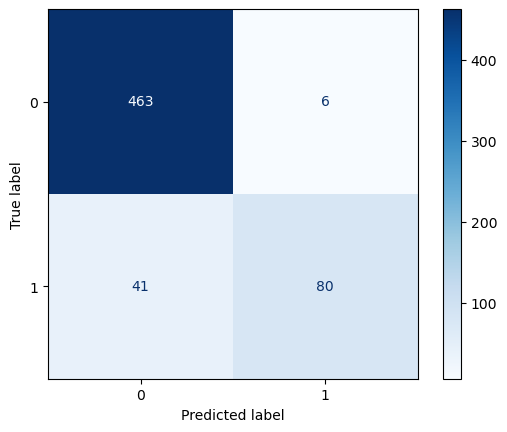

In [1382]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(SecondY, y_pred)
disp_best.plot(cmap='Blues')

In [1383]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

ValueError: Found input variables with inconsistent numbers of samples: [590, 987]

In [996]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [997]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [998]:
y_pred = rf.predict(X_test)

In [999]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.88


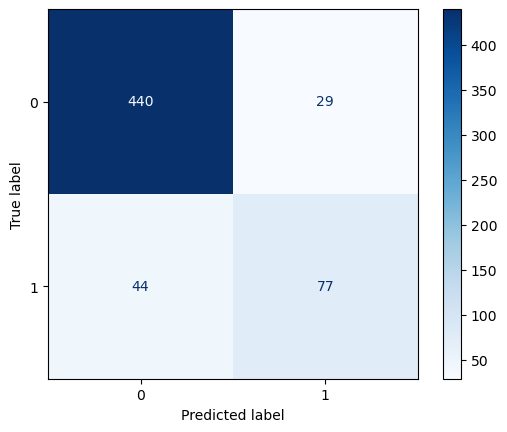

In [1000]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

In [175]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Scale features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(16, activation='relu'),  # Third hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predict probabilities on test data
y_pred_proba = model.predict(X_test_scaled)

# Convert probabilities to binary predictions (e.g., if > 0.5, predict 1)
y_pred = (y_pred_proba > 0.5).astype(int)

# You can also compute other metrics like precision, recall, F1 score:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


c:\Users\rschw\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


ValueError: Invalid dtype: category

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],          # Number of trees in the forest.
    'max_depth': [None, 10, 20, 30],         
    'max_features': ['sqrt', 'log2'],       
    'bootstrap': [True, False]              
}

In [ ]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(RandomForestClassifier(), 
#                           param_grid=param_grid) 
#grid_search.fit(X_train, y_train) 
#print(grid_search.best_estimator_) 

In [ ]:
#model_grid = RandomForestClassifier(max_depth=10, 
#                                    n_estimators=150,
#                                    random_state=42) 
#model_grid.fit(X_train, y_train) 

In [ ]:
#y_pred_grid = model_grid.predict(X_test) 
#print("Accuracy:", accuracy_score(y_test, y_pred_grid))
#print(classification_report(y_pred_grid, y_test)) 

Accuracy: 0.34345047923322686
              precision    recall  f1-score   support

           0       0.31      0.35      0.33       107
           1       0.42      0.36      0.39       169
           2       0.43      0.33      0.38       190
           3       0.33      0.37      0.35       117
           4       0.13      0.26      0.17        43

    accuracy                           0.34       626
   macro avg       0.32      0.33      0.32       626
weighted avg       0.37      0.34      0.35       626



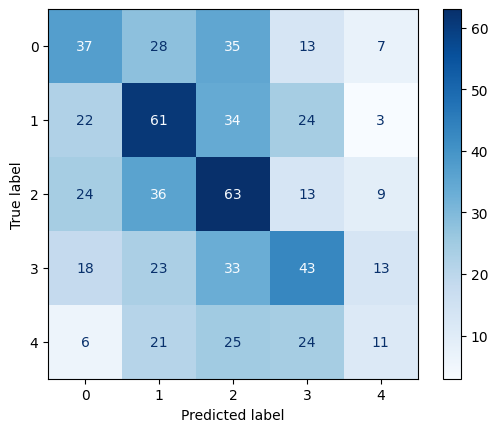

In [ ]:
#cm_best = confusion_matrix(y_test, y_pred_grid)
#disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
#disp_best.plot(cmap='Blues')

Logistic Regression

In [573]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [574]:
X_original = week_one.drop(columns=['down','offenseFormation','gameId','playId','receiverAlignment','targetedReceiver','maxSeparationReceiver','absoluteYardlineNumber','sixthY', 'motionReceiverTarget', 'safetyBottom'])
X = pd.get_dummies(X_original, columns=['rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['safetyBottom'] not found in axis"

In [ ]:
class_weights = {0: 1, 1: 2}
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42, class_weight=class_weights)

# Train the model
log_model.fit(X_train, y_train)

c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': log_model.coef_[0]  # For binary classification, use model.coef_
})

# For multiclass classification, handle multiple sets of coefficients
if log_model.coef_.shape[0] > 1:
    for i, class_coef in enumerate(log_model.coef_):
        feature_importances[f'Class_{i}'] = class_coef

# Sort by absolute importance for a given class (optional)
feature_importances['Absolute_Importance'] = feature_importances['Importance'].abs()
feature_importances = feature_importances.sort_values(by='Absolute_Importance', ascending=False)


In [ ]:
feature_importances.head(60)

,Feature,Importance,Absolute_Importance
23,offenseFormation_JUMBO,-0.572465,0.572465
41,pff_passCoverage_Cover-3 Cloud Left,0.532822,0.532822
46,pff_passCoverage_Goal Line,0.421857,0.421857
48,pff_passCoverage_Prevent,-0.407536,0.407536
43,pff_passCoverage_Cover-3 Double Cloud,0.295900,0.295900
24,offenseFormation_PISTOL,0.272604,0.272604
42,pff_passCoverage_Cover-3 Cloud Right,-0.261151,0.261151
35,pff_passCoverage_Cover 6-Left,0.239287,0.239287
33,pff_passCoverage_2-Man,-0.234370,0.234370
25,offenseFormation_SHOTGUN,0.220129,0.220129


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5942492012779552
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69       410
           1       0.41      0.40      0.41       216

    accuracy                           0.59       626
   macro avg       0.55      0.55      0.55       626
weighted avg       0.59      0.59      0.59       626



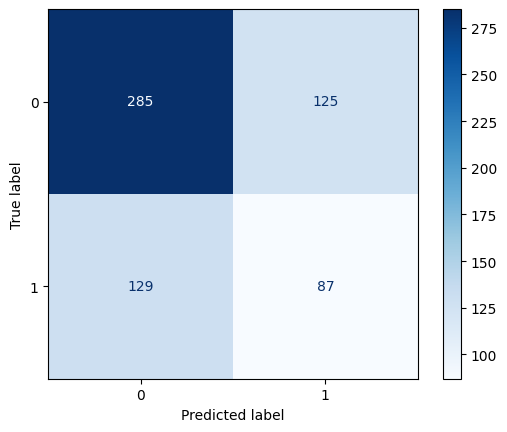

In [ ]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','maxSeparationReceiver', 'sixthY','safetyTop'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
X = X.drop(columns=['receiverAlignment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr', random_state=42, class_weight="balanced")

# Fit the model to the training data
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6038338658146964
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71       410
           1       0.41      0.36      0.39       216

    accuracy                           0.60       626
   macro avg       0.55      0.55      0.55       626
weighted avg       0.59      0.60      0.60       626



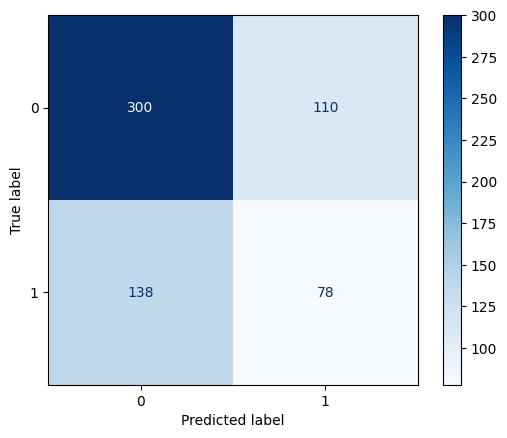

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
X_original = week_one.drop(columns=['gameId','playId','down','offenseFormation','motionReceiver','targetedReceiver','pff_passCoverage','maxSeparationReceiver', 'motionReceiverTarget'])
X = pd.get_dummies(X_original, columns=['rbPosition','motionCluster'])
X = X.drop(columns=['receiverAlignment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y = week_one['motionReceiverTarget']
y = y.astype("category")

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'], 
    'kernel': ['rbf', 'linear'],
    'class_weight': ['balanced']
}

In [ ]:
grid_search = GridSearchCV(SVC(decision_function_shape='ovr', random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.6836000000000001


In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(grid_search, X_test, y_test, scoring='accuracy', n_repeats=30, random_state=42)

importances = perm_importance.importances_mean
stds = perm_importance.importances_std
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances,
    'StdDev': stds
}).sort_values(by='Importance', ascending=False)

In [ ]:
importance_df

,Feature,Importance,StdDev
13,motionReceiverTarget,0.459638,0.022038
14,rbPosition_0,0.000000,0.000000
25,motionCluster_5.0,0.000000,0.000000
24,motionCluster_4.0,0.000000,0.000000
23,motionCluster_3.0,0.000000,0.000000
22,motionCluster_2.0,0.000000,0.000000
21,motionCluster_1.0,0.000000,0.000000
20,motionCluster_0.0,0.000000,0.000000
19,rbPosition_5,0.000000,0.000000
18,rbPosition_4,0.000000,0.000000


In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.6549520766773163
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       410
           1       0.00      0.00      0.00       216

    accuracy                           0.65       626
   macro avg       0.33      0.50      0.40       626
weighted avg       0.43      0.65      0.52       626



c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

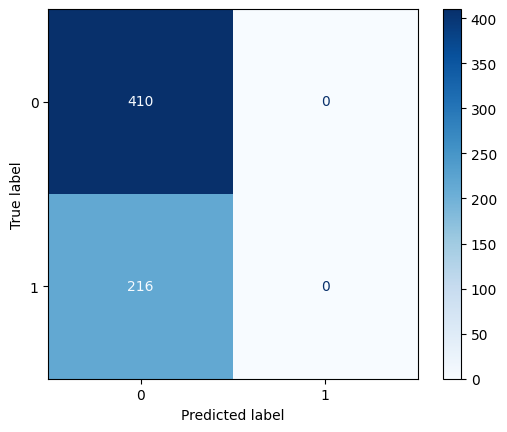

In [ ]:
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

Neural Network

In [221]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [222]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','receiverAlignment','maxSeparationReceiver','sixthY', 'motionReceiverTarget'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])

In [223]:
y = week_one['motionReceiverTarget']
y = y.astype("category")
y = y.cat.codes

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [225]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

c:\Users\rschw\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [226]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [227]:
tf.random.set_seed(42)
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5528 - loss: 0.7763 - val_accuracy: 0.7160 - val_loss: 0.6224
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.5798 - val_accuracy: 0.7160 - val_loss: 0.6186
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.5657 - val_accuracy: 0.7037 - val_loss: 0.5932
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7165 - loss: 0.5777 - val_accuracy: 0.7037 - val_loss: 0.5895
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7440 - loss: 0.5432 - val_accuracy: 0.7037 - val_loss: 0.5886
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7331 - loss: 0.5375 - val_accuracy: 0.7160 - val_loss: 0.5912
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.5257 - val_accuracy: 0.7160 - val_loss: 0.5831
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.5259 - val_accuracy: 0.7160 - val_loss

In [228]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {test_acc:.2f}")

Test Accuracy: 0.60


In [229]:
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probabilities, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


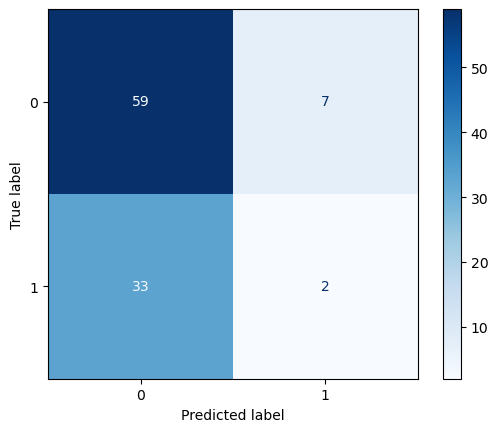

In [230]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

In [231]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [232]:
tf.random.set_seed(42)
history = model.fit(X_resampled, y_resampled, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8393 - loss: 0.4833 - val_accuracy: 0.9483 - val_loss: 0.2166
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8428 - loss: 0.3758 - val_accuracy: 0.9310 - val_loss: 0.2126
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8687 - loss: 0.2853 - val_accuracy: 0.9224 - val_loss: 0.2303
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9160 - loss: 0.2722 - val_accuracy: 0.9655 - val_loss: 0.1614
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9095 - loss: 0.2376 - val_accuracy: 0.9655 - val_loss: 0.1620
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8988 - loss: 0.2612 - val_accuracy: 0.9741 - val_loss: 0.1754
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9342 - loss: 0.1913 - val_accuracy: 0.9741 - val_loss: 0.1359
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9268 - loss: 0.2044 - val_accuracy: 0.9828 - val_loss:

In [233]:
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probabilities, axis=1)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Test Accuracy: 0.6039603960396039


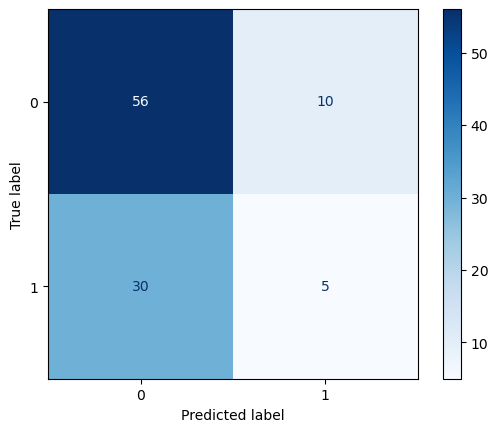

In [234]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

XGBoost

In [ ]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','pff_passCoverage','receiverAlignment','maxSeparationReceiver','sixthY','safetyTop', 'motionReceiverTarget'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','motionReceiver','motionCluster'])

In [ ]:
bool_cols = ['yardsToGo', 'absoluteYardlineNumber', 'inMotionAtBallSnap', 'fifthY', 'aboveLine','belowLine']  # Add other boolean columns as needed
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
y = week_one['motionReceiverTarget']
y = y.astype("category")
y = y.cat.codes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
class_counts = y_train.value_counts()
scale_pos_weight = class_counts.max() / class_counts.min()

In [ ]:
class_weights={0:1,1:2}
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='merror',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    gamma=0, 
    subsample=0.8,
    colsample_bytree=0.8,
    random_state = 42,
    class_weight = class_weights
)

model.fit(X_train, y_train)

c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:40:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight={0: 1, 1: 2}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=5, ...)

In [ ]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Testing Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       410
           1       0.37      0.11      0.17       216

    accuracy                           0.63       626
   macro avg       0.51      0.51      0.46       626
weighted avg       0.56      0.63      0.56       626



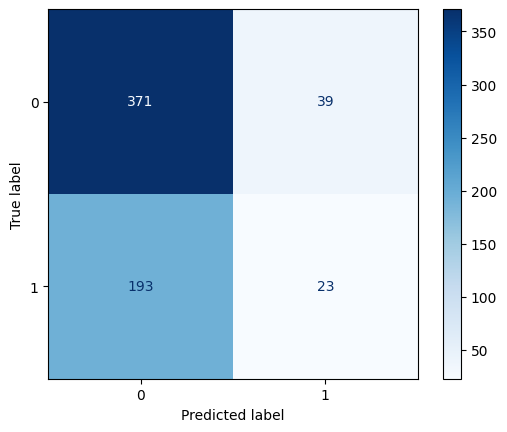

In [ ]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')